In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

In [4]:
path = 'data\cars_train.csv'
df = pd.read_csv(path)


In [143]:
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,ate_cinco,cinco_dez,mais_dez
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59008,True,False,False
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,...,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33263,True,False,False
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,...,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450,True,False,False
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,...,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.35890,False,True,False
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,...,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76389,False,True,False


Text(0.5, 0, 'Ano de Fabricação')

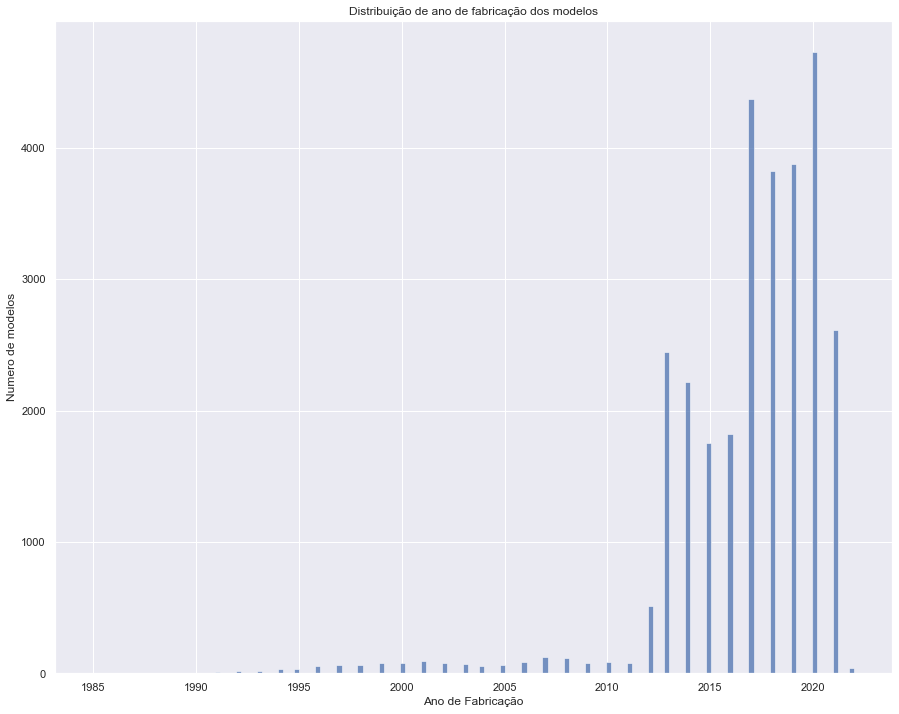

In [120]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df, x = 'ano_de_fabricacao')
graph.set_title("Distribuição de ano de fabricação dos modelos")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")

(2009.0, 2022.0)

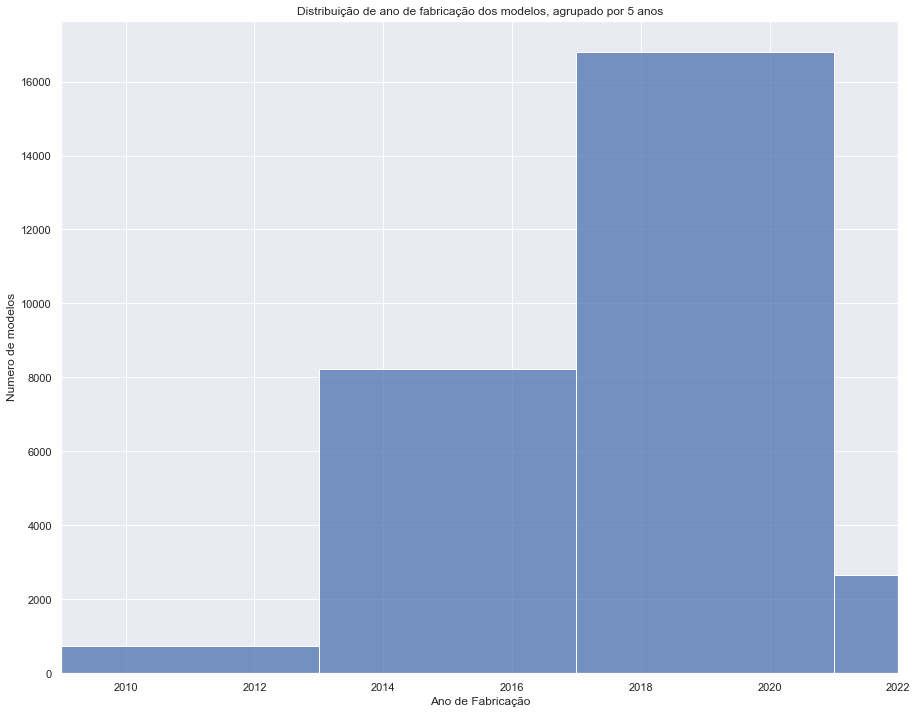

In [52]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df, x = 'ano_de_fabricacao',binwidth=4)
graph.set_title("Distribuição de ano de fabricação dos modelos, agrupado por 5 anos")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")
graph.set_xlim(2009,2022)

(0.0, 500000.0)

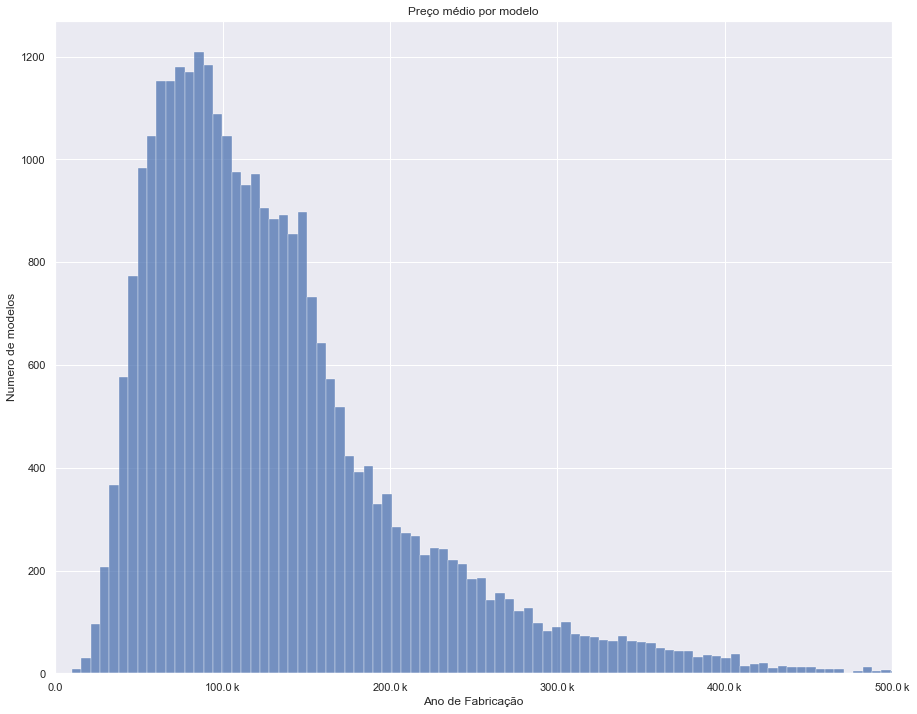

In [80]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df, x = 'preco')
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")
formatter = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
graph.xaxis.set_major_formatter(formatter)
graph.set_xlim(0,500000)

In [72]:
ate_cinco = df['ano_de_fabricacao'] > 2016
cinco_dez = (df['ano_de_fabricacao'] < 2017) & (df['ano_de_fabricacao'] > 2012)
dez_mais = df['ano_de_fabricacao'] < 2012


(0.0, 500000.0)

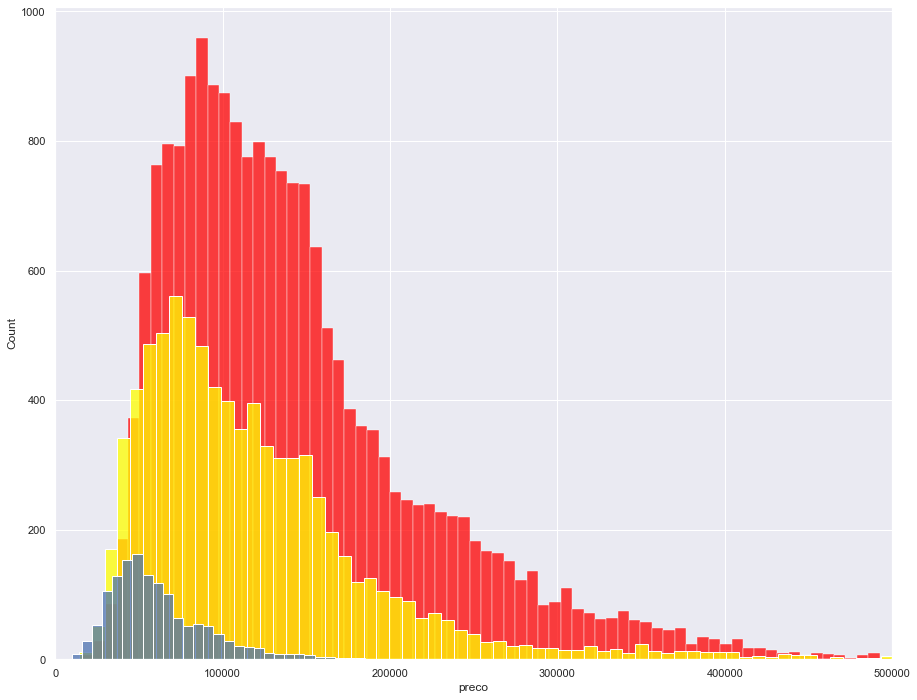

In [115]:
sns.set()
plt.figure(figsize=(15, 12))
sns.histplot(data = df[ate_cinco], x = 'preco', color='red').set_xlim(0,500000)
sns.histplot(data = df[cinco_dez], x = 'preco', color='yellow').set_xlim(0,500000)
sns.histplot(data = df[dez_mais], x = 'preco').set_xlim(0,500000)
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")
formatter = EngFormatter(places=0, sep="\N{THIN SPACE}") 
graph.xaxis.set_major_formatter(formatter)
graph.set_xlim(0,500000)

In [123]:
anunciantes = df['anunciante'].unique()
print(anunciantes)


['Pessoa Física' 'Loja' 'Concessionária'
 'Acessórios e serviços para autos']


Preço - Tipo de vendedor

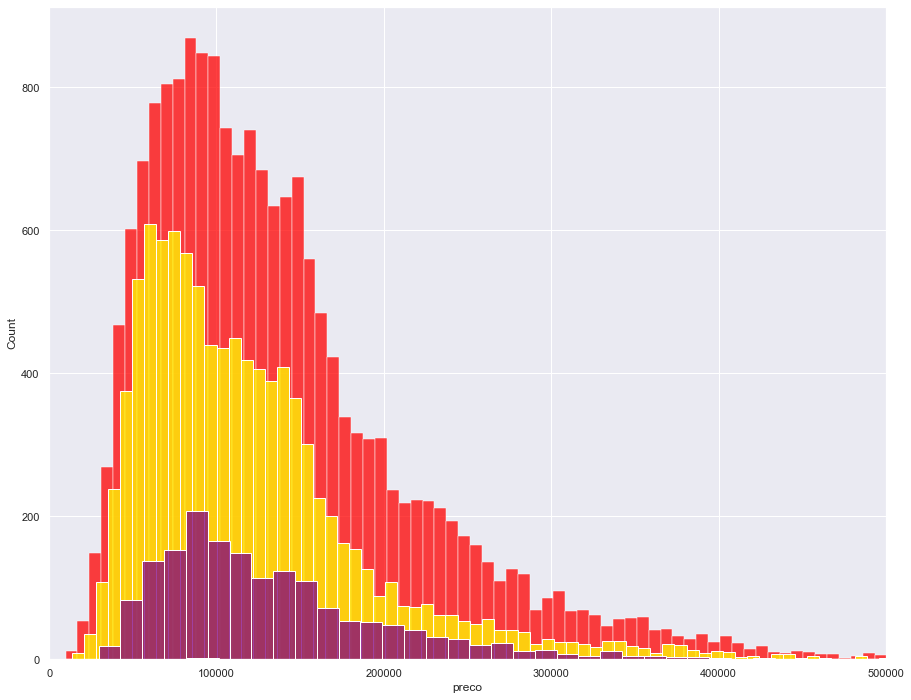

In [114]:
fisico = (df['anunciante'] == 'Pessoa Física')
loja = (df['anunciante'] == 'Loja')
conc = (df['anunciante'] == 'Concessionária')
acess = (df['anunciante'] == 'Acessórios e serviços para autos')

sns.set()
plt.figure(figsize=(15, 12))
sns.histplot(data = df[fisico], x = 'preco', color='red').set_xlim(0,500000)
sns.histplot(data = df[loja], x = 'preco', color='yellow').set_xlim(0,500000)
sns.histplot(data = df[conc], x = 'preco',color='purple').set_xlim(0,500000)
sns.histplot(data = df[acess], x = 'preco')
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")
formatter = EngFormatter(places=0, sep="\N{THIN SPACE}") 
graph.xaxis.set_major_formatter(formatter)


In [104]:
acess = df.loc[df['anunciante']=='Acessórios e serviços para autos']
acess

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,ate_cinco,cinco_dez,mais_dez
7101,325595364733171489830290423130917337911,8.0,CHERY,ARRIZO 5,1.5 VVT TURBO iFLEX RX CVT,2019,2019,39879,Automática,4,...,NaN,NaN,NaN,NaN,NaN,NaN,81030.89155,True,False,False
7622,213173366989235637436164003309557433415,15.0,HYUNDAI,HB20,1.0 COMFORT 12V FLEX 4P MANUAL,2019,2019,51755,Manual,4,...,NaN,NaN,NaN,NaN,NaN,NaN,89592.60118,True,False,False
11350,107007813282026025300295981287457809867,16.0,FORD,KA,1.0 TI-VCT FLEX SE PLUS MANUAL,2019,2019,31997,Manual,4,...,NaN,NaN,NaN,NaN,NaN,NaN,42554.54082,True,False,False
12669,233236609660573145344284011055081643692,8.0,VOLKSWAGEN,SAVEIRO,1.6 CROSS CD 16V FLEX 2P MANUAL,2020,2021,30363,Manual,4,...,NaN,NaN,NaN,NaN,NaN,NaN,101221.94360,True,False,False


ANO DE FABRICAÇÃO, TIPO DE VENDEDOR

Text(0.5, 17.200000000000003, 'Ano de Fabricação')

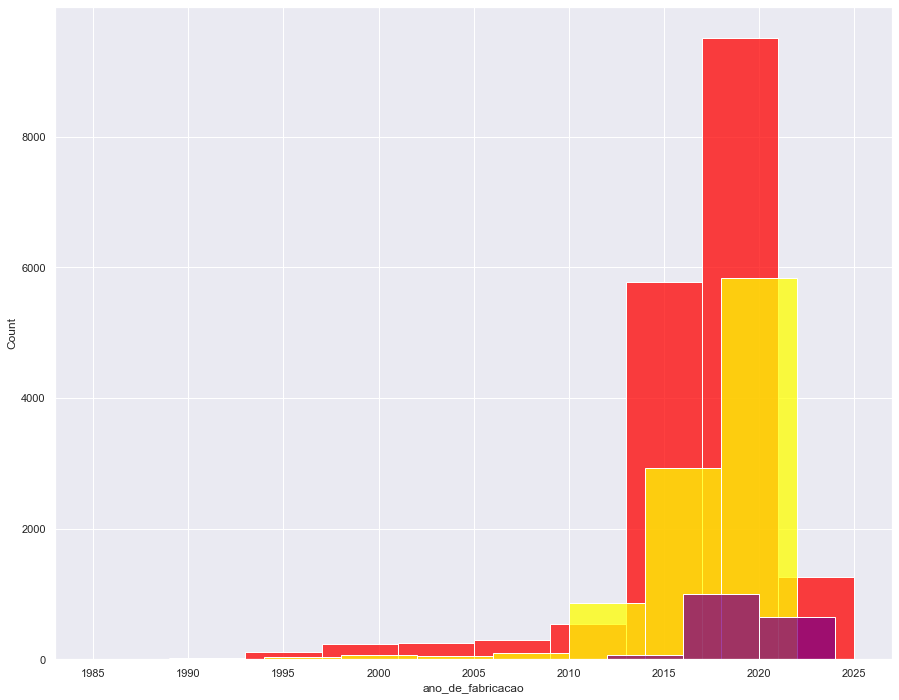

In [112]:
sns.set()
plt.figure(figsize=(15, 12))
sns.histplot(data = df[fisico], x = 'ano_de_fabricacao', color='red',binwidth=4)
sns.histplot(data = df[loja], x = 'ano_de_fabricacao', color='yellow',binwidth=4)
sns.histplot(data = df[conc], x = 'ano_de_fabricacao',color='purple',binwidth=4)
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")

#formatter = EngFormatter(places=0, sep="\N{THIN SPACE}") 
#graph.xaxis.set_major_formatter(formatter)
#graph.set_xlim(0,500000)

In [122]:
portas = df['num_portas'].unique()
print(portas)

[4 2 3]


In [124]:
tres_portas = df.loc[df['num_portas'] == 3]
tres_portas

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,ate_cinco,cinco_dez,mais_dez
734,63833503557727963117144856024451837146,15.0,FIAT,DUCATO,2.3 MULTIJET DIESEL MAXICARGO MANUAL,2019,2020,25359,Manual,3,...,NaN,NaN,NaN,NaN,NaN,NaN,163758.61650,True,False,False
791,52406443374972496219439907843051712946,14.0,VOLKSWAGEN,SAVEIRO,1.6 CROSS CE 16V FLEX 2P MANUAL,2015,2016,95656,Manual,3,...,NaN,NaN,NaN,NaN,NaN,NaN,125619.25860,False,True,False
2047,221840944585208773857515626266413117720,14.0,MERCEDES-BENZ,CLC 200 K,1.8 KOMPRESSOR 16V GASOLINA 2P AUTOMATICO,1999,2014,153909,Automática,3,...,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,134619.53260,False,False,True
2660,209052999009686863855587096190582220393,8.0,RENAULT,SANDERO,1.6 16V SCE FLEX STEPWAY MANUAL,2017,2018,80189,Manual,3,...,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,61088.50820,True,False,False
4411,208623035278673781563602245202263825307,13.0,TOYOTA,HILUX,3.0 SRV 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P...,2014,2015,89398,Automática,3,...,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,112589.34530,False,True,False
4744,153869601246488237757646603931314191918,13.0,MERCEDES-BENZ,C 250,2.0 CGI SPORT COUPÉ TURBO 16V GASOLINA 2P AUTO...,2014,2014,90637,Automática,3,...,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,179691.61120,False,True,False
6908,46331204796572079150624384417006192512,16.0,FIAT,STRADA,1.8 MPI ADVENTURE CD 16V FLEX 2P MANUAL,1996,2012,118596,Manual,3,...,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,75417.25090,False,False,True
10280,85845649841718341065084593901278322825,8.0,CHEVROLET,MONTANA,1.4 MPFI LS CS 8V FLEX 2P MANUAL,2019,2020,45360,Manual,3,...,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,51710.91607,True,False,False
14235,317620156821734808464439235055651641438,16.0,FIAT,STRADA,1.8 MPI ADVENTURE CD 16V FLEX 3P MANUAL,2015,2017,89334,Manual,3,...,NaN,NaN,NaN,NaN,NaN,NaN,52076.70945,False,True,False
14624,16722563716672609784813377714490237093,9.0,RENAULT,DUSTER OROCH,2.0 16V FLEX DYNAMIQUE 4P MANUAL,2017,2017,88432,Manual,3,...,NaN,NaN,NaN,NaN,NaN,NaN,31285.12013,True,False,False


In [126]:
anunciantes = df['cambio'].unique()
print(anunciantes)

['CVT' 'Automática' 'Manual' 'Automatizada' 'Semi-automática'
 'Automatizada DCT' 'Automática Sequencial']


In [127]:
unico = df['veiculo_único_dono'].unique()
print(unico)

[nan 'Único dono']


In [139]:
n_unicos = df['veiculo_único_dono'].isnull()

unicos = (df['veiculo_único_dono'] == 'Único dono')

print(unicos.sum(),n_unicos.sum())

10423 19161


Text(0.5, 17.200000000000003, 'Ano de Fabricação')

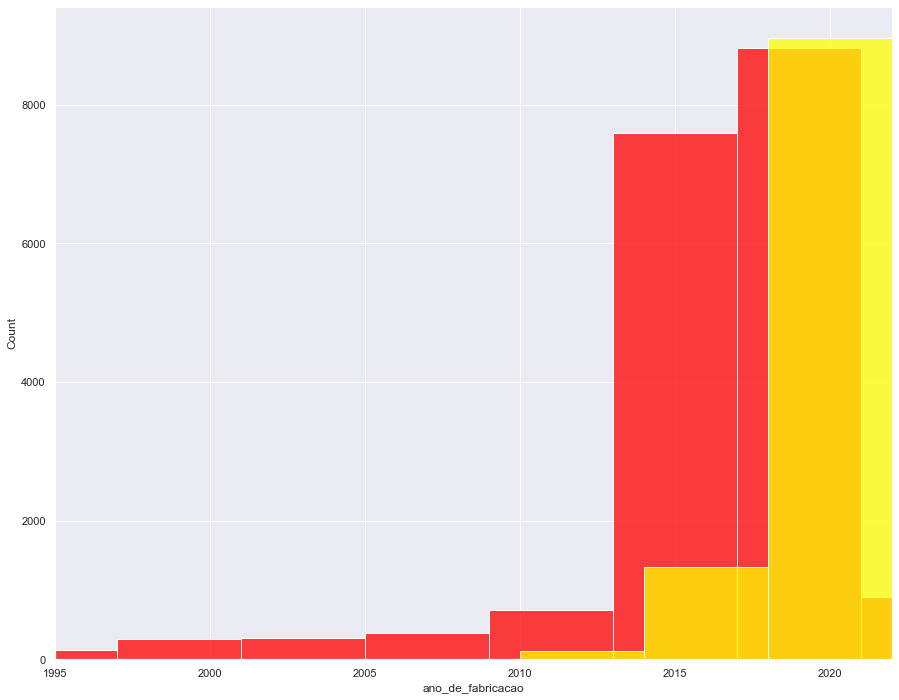

In [141]:
sns.set()
plt.figure(figsize=(15, 12))
sns.histplot(data = df[n_unicos], x = 'ano_de_fabricacao', color='red',binwidth=4).set_xlim(1995,2022)
sns.histplot(data = df[unicos], x = 'ano_de_fabricacao', color='yellow',binwidth=4).set_xlim(1995,2022)
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")

#formatter = EngFormatter(places=0, sep="\N{THIN SPACE}") 
#graph.xaxis.set_major_formatter(formatter)
#graph.set_xlim(0,500000)

In [145]:
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,ate_cinco,cinco_dez,mais_dez
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59008,True,False,False
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,...,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33263,True,False,False
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,...,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450,True,False,False
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,...,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.35890,False,True,False
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,...,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76389,False,True,False
